## 4.1 EDA and data preprocessing 	(5b) 

In [34]:
# vybrali sme si dataset: TODO: SEM NAPISAT DATASET KTORY SME SI VYBRALI 

In [35]:
# importy
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from pathlib import Path
folder = Path("./Covid19-dataset")


classes = ["Covid", "Viral Pneumonia", "Normal"]
train_dir_path = folder / "train"
test_dir_path = folder / "test"

In [36]:
from typing import *

- (A-4b)	EDA a data preprocessing pre Vami vybrané charakteristiky z datasetu 

In [37]:
# Najprv zacneme preskumanim struktury datasetu

# vypis velkosti konkretnych dat pre kazdu classu
for cls in classes:
    print(f"{cls} - Train Images: {len(os.listdir(train_dir_path/cls))}")
    print(f"{cls} - Test Images: {len(os.listdir(test_dir_path/cls))}")    

Covid - Train Images: 111
Covid - Test Images: 26
Viral Pneumonia - Train Images: 70
Viral Pneumonia - Test Images: 20
Normal - Train Images: 70
Normal - Test Images: 20


In [38]:
# Dalej si vypiseme a zobrazime graficky rozsah
# rozlisenia (pocet pixelov) pre classy
from PIL import Image

def visualize_resolutions(class_name: str, data_path: str):
    class_path = os.path.join(data_path, class_name)
    images_lst = os.listdir(class_path)
    
    resolutions = []

    # Iterate through images and collect resolutions
    for image_name in images_lst:
        image_path = os.path.join(class_path, image_name)
        try:
            # Load the image
            image = Image.open(image_path)
            # Get the resolution
            width, height = image.size
            resolutions.append((width, height))
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
    
    # Calculate resolution ranges
    widths = [res[0] for res in resolutions]
    heights = [res[1] for res in resolutions]
    
    width_range = (min(widths), max(widths))
    height_range = (min(heights), max(heights))
    
    print(f"Width range: {width_range}")
    print(f"Height range: {height_range}")
    
    # Visualize resolution distribution
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for individual resolutions
    plt.scatter(widths, heights, alpha=0.7, label="Image Resolutions")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title(f"Resolution Distribution for {class_name}")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Histogram of widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, alpha=0.7, color='blue', label="Widths")
    plt.xlabel("Width")
    plt.ylabel("Frequency")
    plt.title("Width Distribution")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, alpha=0.7, color='green', label="Heights")
    plt.xlabel("Height")
    plt.ylabel("Frequency")
    plt.title("Height Distribution")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Width range: (439, 4248)
Height range: (391, 4095)


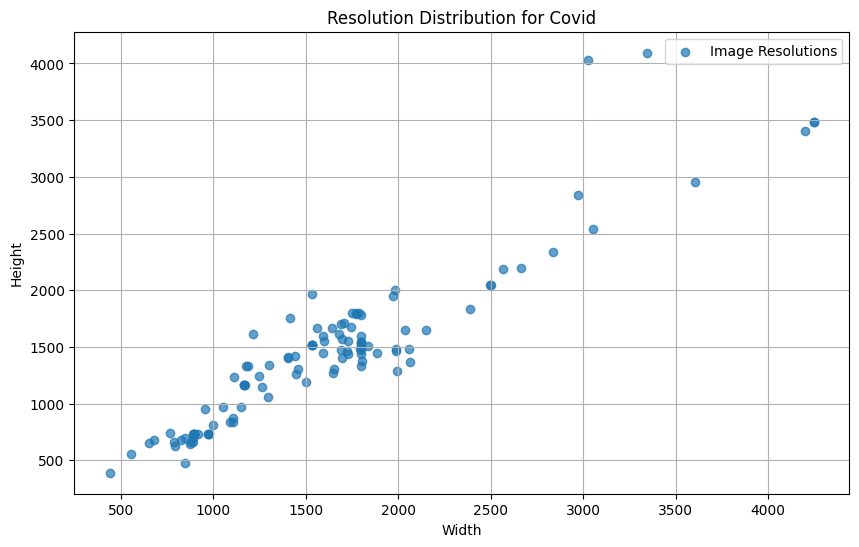

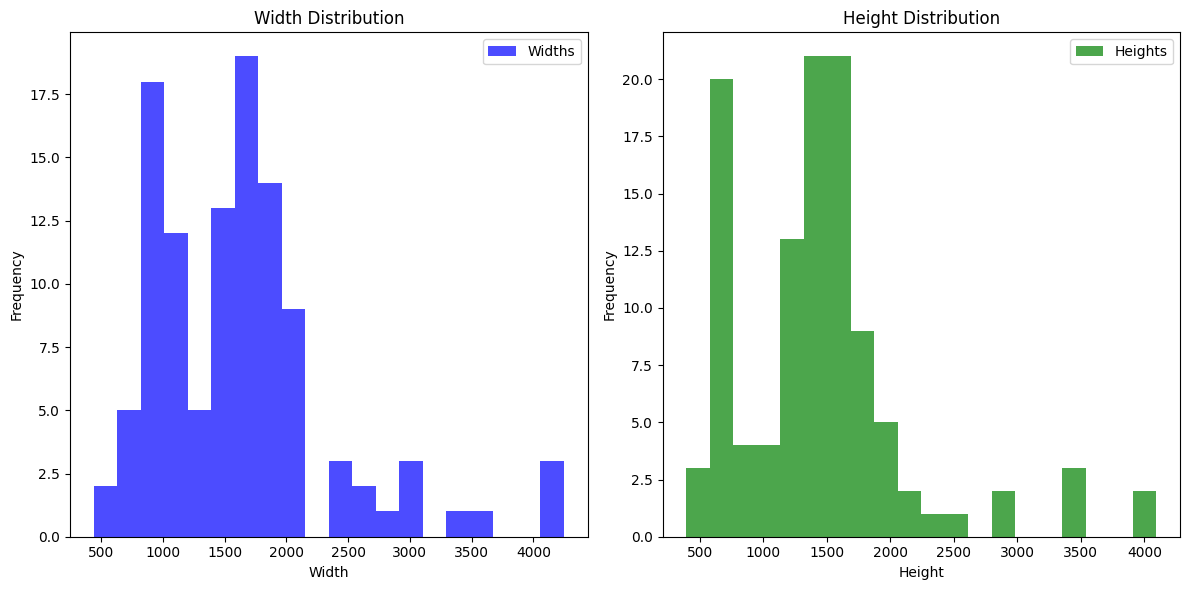

Width range: (1056, 2000)
Height range: (744, 1456)


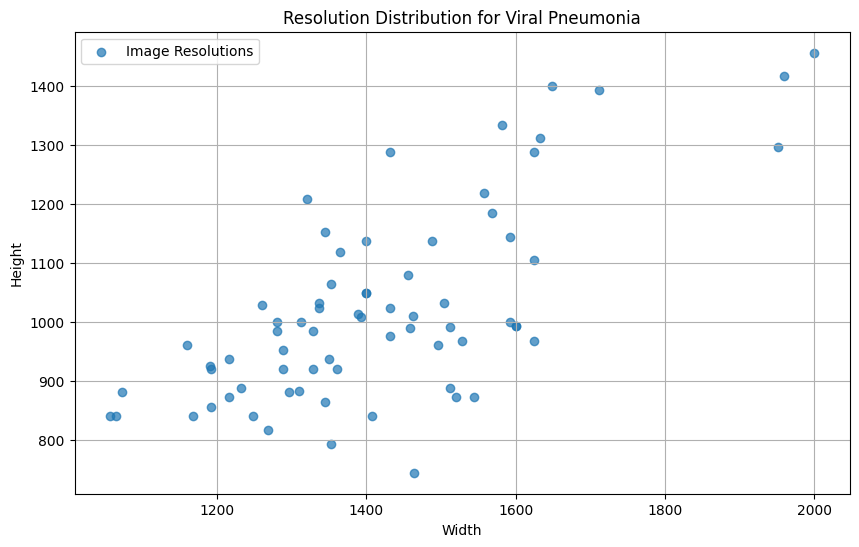

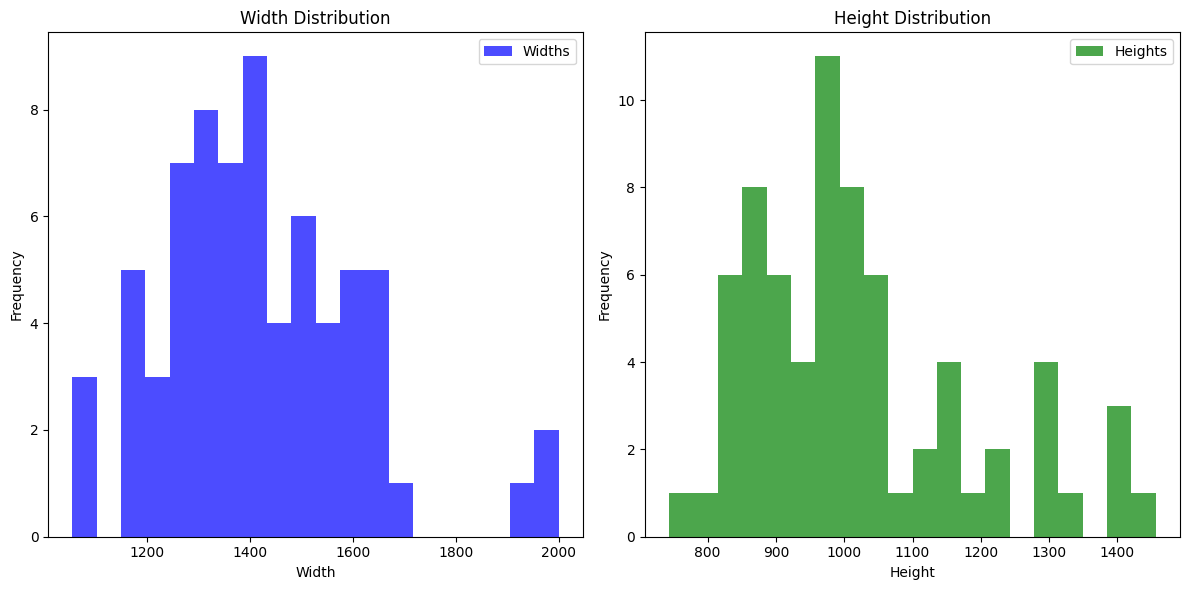

Width range: (1534, 2752)
Height range: (1063, 2713)


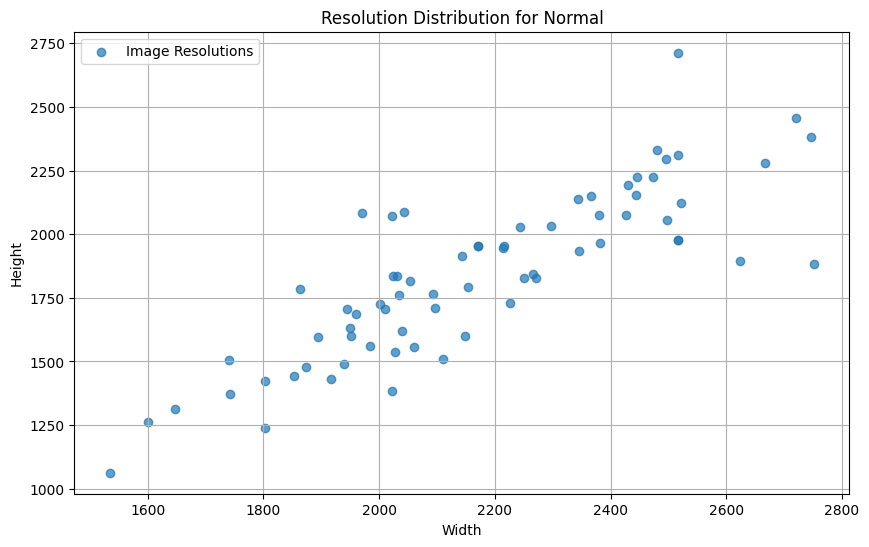

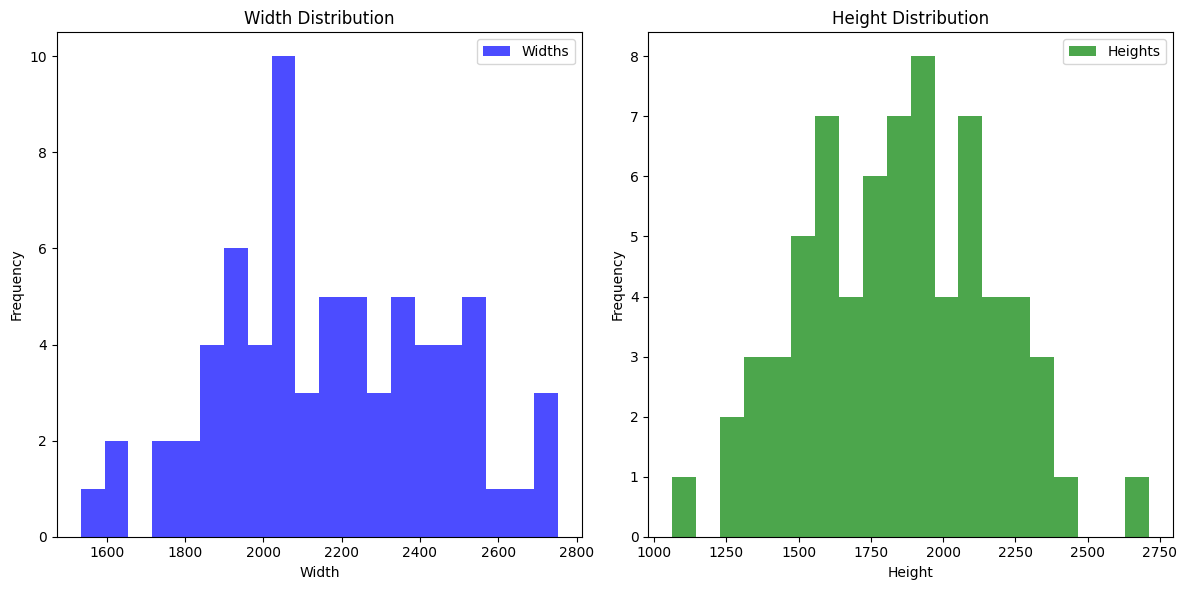

In [39]:
for cls in classes:
    visualize_resolutions(cls, train_dir_path)

In [40]:
from random import sample
# definujeme si funkciu ktora vizualizuje nahodne samples obrazkov
# zo zadanej classy
def visualize_samples(class_name: str, data_path: str, sample_size: int):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    images_sample = sample(images_lst, sample_size)
    plt.figure(figsize=(10, sample_size))
    for i, image_name in enumerate(images_sample):
        img_path = class_path/image_name
        img_arr = plt.imread(img_path)
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img_arr, cmap="gray")
        plt.title(class_name + " " + image_name)
        plt.axis("off")
    plt.show()

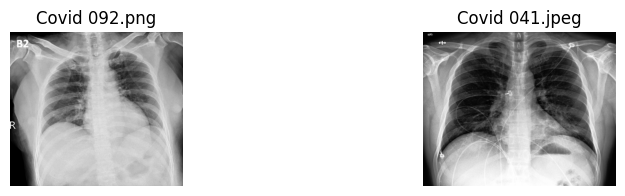

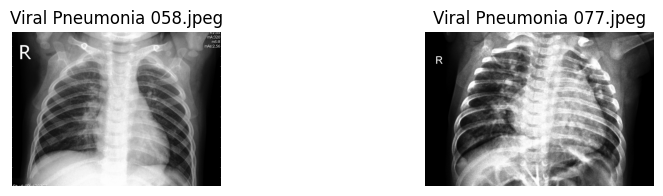

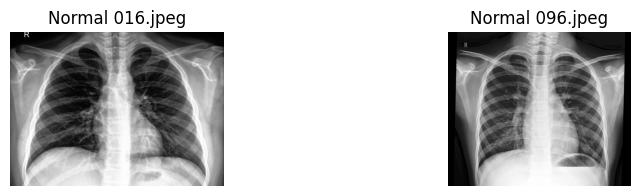

In [41]:
for cls in classes:
    visualize_samples(cls, train_dir_path, 2)

In [42]:
def is_grayscale(image_path):
    # Load the image
    image = Image.open(image_path)
    
    # Convert to numpy array
    img_array = np.array(image)
    
    # Check if it's an RGB image
    if image.mode == "RGB":
        # Compare all three channels (R, G, B) for equality
        if np.all(img_array[:, :, 0] == img_array[:, :, 1]) and np.all(img_array[:, :, 1] == img_array[:, :, 2]):
            return True
    return False

In [43]:
# na sample snimkoch mozme vidiet ze su obrazky 
# v grayscale, chceme sa ale presvedcit ci su 
# takehoto typu vsetky obrazky v datasete, 
# preto prejdeme celym datasetom a ziskame "rgb" mode
# alebo "L" mode ktore oznacuje grayscale

def print_color_modes(class_name: str, data_path:str):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    color_modes = []
    for image_name in images_lst:
        try:
            image = Image.open(class_path/image_name)
            if is_grayscale(class_path/image_name):
                color_modes.append("L")
            else:
                color_modes.append(image.mode)
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

    mode_counts = Counter(color_modes)
    print(f"Color modes in {class_name} class")
    for mode, count in mode_counts.items():
        print(f"{mode}: {count}")
    print()

In [44]:
for cls in classes:
    print_color_modes(cls, train_dir_path)


Color modes in Covid class
L: 102
RGBA: 5
RGB: 4

Color modes in Viral Pneumonia class
L: 70

Color modes in Normal class
L: 70



In [45]:
# 1st output:
# Color modes in Covid class
# RGB: 69
# RGBA: 5
# L: 37

# Color modes in Viral Pneumonia class
# RGB: 70

# Color modes in Normal class
# RGB: 70

# mozme vidiet ze vacsia cast snimkov su ulozene v RGB mode
# presnejsie 209/251, predtym ako vsetky convertujeme na grayscale
# sa ujistime ze RGB hodnoty pri RGB zakodovanych obrazkoch
# su hodnoty, co by vypocedalo ze su grayscale, aj ked su v RGB mode

# pridame funkciu a upravime povodnu funkciu na detekciu modov

In [46]:
#2nd output:
# Color modes in Covid class
# L: 102
# RGBA: 5
# RGB: 4

# Color modes in Viral Pneumonia class
# L: 70

# Color modes in Normal class
# L: 70

In [47]:
# Z 2. iteracie vysledkov mozme vidiet ze vacsina obrazkov je grayscale
# a preto je bezpecne prehlasit ze mozme zmenit celemu datasetu mode na gray scale
# pre konzistenciu, alebo s nim narabat tak, ze su vsetky obrazky rovnakeho typu

In [48]:
# este skontrolujeme v akom formate su snimky ulozene

def print_image_formats(class_name: str, data_path:str):
    class_path = data_path/class_name
    images_lst: List[str] = os.listdir(class_path)
    formats = []
    for image_name in images_lst:
        
        formats.append(image_name.split(".")[-1])
    
    format_counts = Counter(formats)
    print(f"Image formats in {class_name} class")
    for img_format, count in format_counts.items():
        print(f"{img_format}: {count}")
    print()

In [49]:
for cls in classes:
    print_image_formats(cls, train_dir_path)

Image formats in Covid class
jpeg: 46
png: 8
jpg: 57

Image formats in Viral Pneumonia class
jpeg: 70

Image formats in Normal class
jpeg: 70



In [52]:
# mozme vidiet ze nemame konzistentne file formaty,
# co by nemuselo, ale mohlo v buducnosti vadit v nasom workflowe
# preto v jednej funkcii vsetky obrazky zmenine do graysclae modu "L"
# a taktiez ich convertujeme na konzistentny rovnaky
# file format


def convert_to_grayscale_and_save(source_folder, target_folder, target_format="JPEG"):

    os.makedirs(target_folder, exist_ok=True)
    
    for image_name in os.listdir(source_folder):
        try:
            # Define source and target paths
            image_path = source_folder / image_name
            new_name = os.path.splitext(image_name)[0] + ".jpg"
            target_path = target_folder / new_name
            
            # Open the image
            image = Image.open(image_path)
            
            # Convert to grayscale
            grayscale_image = image.convert("L")
            
            # Save in the target format
            grayscale_image.save(target_path, target_format)
            
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

In [53]:
save_path_train = Path("./Covid_preprocess/train/")
for cls in classes:
    convert_to_grayscale_and_save(train_dir_path/cls, save_path_train/cls)


In [57]:
save_path_test = Path("./Covid_preprocess/test/")
for cls in classes:
    convert_to_grayscale_and_save(test_dir_path/cls, save_path_test/cls)


- (B-1b)	Zdôvodnite výber ML/DL metód vzhľadom na Vami vybraný dataset pre 4.2

## 4.2. Modeling and evaluation (5b)


- (A-4b)	Modeluje Vami tie vybrané charakteristiky pomocou vhodných ML/DL	metód. Výsledok modelovania je najlepší model.


- (B-1b)	Zhodnotíte Váš prístup a získaný výsledok	